In [1]:
import pandas as pd

In [2]:
matches = pd.read_csv("matches.csv")
matches.head(6)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
5,8,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Away,W,1.0,0.0,...,Match Report,NaN,15.0,3.0,16.5,0.0,0.0,0.0,2022,Manchester City


In [3]:
matches.shape

(1389, 28)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [5]:
matches['team'].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [6]:
matches['round'].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [7]:
matches.dtypes

Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [8]:
matches['date'] = pd.to_datetime(matches['date'])

In [9]:
matches.dtypes

Unnamed: 0               int64
date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

In [10]:
matches['venue_code'] = matches['venue'].astype('category').cat.codes

In [11]:
matches['opp_code'] = matches['opponent'].astype('category').cat.codes

In [12]:
matches['hour'] = matches['time'].str.replace(":.+", "", regex=True).astype('int')

In [13]:
matches['day_code'] = matches['date'].dt.dayofweek

In [14]:
#matches['target'] = matches['result'].map({'L': 0, 'D': 1, 'W': 2})
matches["target"] = (matches["result"] == "W").astype("int")
matches

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(n_estimators=120, min_samples_split= 20, random_state= 1)

In [17]:
train = matches[matches['date'] < '2022-01-01']

In [18]:
test = matches[matches['date'] > '2022-01-01']

In [19]:
predictors = ['venue_code', 'opp_code', 'hour', 'day_code']

In [20]:
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=20, n_estimators=120, random_state=1)

In [21]:
preds = rf.predict(test[predictors])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
acc = accuracy_score(test['target'], preds)
acc

0.6159420289855072

In [24]:
combined = pd.DataFrame(dict(actual = test['target'], predicted = preds))

In [25]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,148,24
1,82,22


In [26]:
from sklearn.metrics import precision_score

In [27]:
precision_score(test["target"], preds)

0.4782608695652174

In [28]:
grouped_matches = matches.groupby("team")

In [29]:
group = grouped_matches.get_group("Chelsea").sort_values("date")

In [30]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [31]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
746,5,2020-10-03,12:30,Premier League,Matchweek 4,Sat,Home,W,4.0,0.0,...,5,1,2.000000,2.000000,12.333333,5.666667,20.366667,0.666667,0.333333,0.666667
747,6,2020-10-17,15:00,Premier League,Matchweek 5,Sat,Home,D,3.0,3.0,...,5,0,2.333333,1.666667,14.333333,5.666667,18.933333,0.666667,0.666667,1.000000
748,8,2020-10-24,17:30,Premier League,Matchweek 6,Sat,Away,D,0.0,0.0,...,5,0,3.333333,2.000000,17.000000,6.666667,15.300000,0.666667,0.666667,0.666667
749,10,2020-10-31,15:00,Premier League,Matchweek 7,Sat,Away,W,3.0,0.0,...,5,1,2.333333,1.000000,11.000000,3.333333,15.300000,0.000000,0.666667,0.666667
750,12,2020-11-07,17:30,Premier League,Matchweek 8,Sat,Home,W,4.0,1.0,...,5,1,2.000000,1.000000,10.666667,5.000000,15.733333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,44,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Home,W,1.0,0.0,...,6,1,2.666667,0.333333,12.000000,5.000000,15.600000,0.666667,0.000000,0.000000
61,47,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,L,1.0,4.0,...,5,0,2.666667,0.333333,11.333333,5.000000,15.133333,0.666667,0.000000,0.000000
62,49,2022-04-09,15:00,Premier League,Matchweek 32,Sat,Away,W,6.0,0.0,...,5,1,1.666667,1.666667,14.666667,6.000000,16.100000,0.666667,0.000000,0.000000
63,52,2022-04-20,19:45,Premier League,Matchweek 25,Wed,Home,L,2.0,4.0,...,2,0,2.666667,1.333333,17.666667,8.333333,17.000000,0.333333,0.000000,0.000000


In [32]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [33]:
matches_rolling

Unnamed: 0       date   time            comp  \
team                                                                        
Arsenal                 898           6 2020-10-04  14:00  Premier League   
                        899           7 2020-10-17  17:30  Premier League   
                        900           9 2020-10-25  19:15  Premier League   
                        901          11 2020-11-01  16:30  Premier League   
                        902          13 2020-11-08  19:15  Premier League   
...                                 ...        ...    ...             ...   
Wolverhampton Wanderers 227          32 2022-03-13  14:00  Premier League   
                        228          33 2022-03-18  20:00  Premier League   
                        229          34 2022-04-02  15:00  Premier League   
                        230          35 2022-04-08  20:00  Premier League   
                        231          36 2022-04-24  14:00  Premier League   

                                    round  day venue result   gf   ga  ...  \
team                                                                   ...   
Arsenal                 898   Matchweek 4  Sun  Home      W  2.0  1.0  ...   
                        899   Matchweek 5  Sat  Away      L  0.0  1.0  ...   
                        900   Matchweek 6  Sun  Home      L  0.0  1.0  ...   
                        901   Matchweek 7  Sun  Away      W  1.0  0.0  ...   
                        902   Matchweek 8  Sun  Home      L  0.0  3.0  ...   
...                                   ...  ...   ...    ...  ...  ...  ...   
Wolverhampton Wanderers 227  Matchweek 29  Sun  Away      W  1.0  0.0  ...   
                        228  Matchweek 30  Fri  Home      L  2.0  3.0  ...   
                        229  Matchweek 31  Sat  Home      W  2.0  1.0  ...   
                        230  Matchweek 32  Fri  Away      L  0.0  1.0  ...   
                        231  Matchweek 34  Sun  Away      L  0.0  1.0  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 898        6       1    2.000000    1.333333   
                        899        5       0    1.666667    1.666667   
                        900        6       0    1.000000    1.666667   
                        901        6       1    0.666667    1.000000   
                        902        6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 227        6       1    1.333333    1.000000   
                        228        4       0    1.666667    0.666667   
                        229        5       1    2.333333    1.000000   
                        230        4       0    1.666667    1.333333   
                        231        6       0    1.333333    1.666667   

                             sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                          
Arsenal                 898    7.666667    3.666667    14.733333   0.666667   
                        899    5.333333    3.666667    15.766667   0.000000   
                        900    7.000000    3.666667    16.733333   0.666667   
                        901    9.666667    4.000000    16.033333   1.000000   
                        902    9.666667    2.666667    18.033333   1.000000   
...                                 ...         ...          ...        ...   
Wolverhampton Wanderers 227   12.333333    3.666667    19.300000   0.000000   
                        228   12.333333    4.333333    19.600000   0.000000   
                        229   13.000000    5.333333    19.833333   0.000000   
                        230   13.000000    5.000000    18.533333   0.000000   
                        231   10.000000    4.666667    17.633333   0.000000   

                            pk_rolling  pkatt_r

In [34]:
matches_rolling.index = range(matches_rolling.shape[0])

In [35]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, acc

In [36]:
combined, acc = make_predictions(matches_rolling, predictors + new_cols)

In [37]:
acc

0.6159420289855072

In [38]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)
combined

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,1,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


In [39]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton",
              "Manchester United": "Manchester Utd",
              "Newcastle United": "Newcastle Utd",
              "Tottenham Hotspur": "Tottenham",
              "West Ham United": "West Ham",
              "Wolverhampton Wanderers": "Wolves"}

mapping = MissingDict(**map_values)

In [40]:
combined["new_team"] = combined["team"].map(mapping)

In [41]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,1,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


to check the accuracy

In [42]:
import pandas as pd

# Assuming 'matches' is the name of your DataFrame
# Replace 'target' with the actual name of your target column
target_column = 'target'

# Select only numeric columns for correlation matrix
numeric_columns = matches.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix without the target variable
correlation_matrix_predictors = numeric_columns.drop(columns=target_column).corr()

# Print or display the correlation matrix
print(correlation_matrix_predictors)


            Unnamed: 0        gf        ga        xg       xga      poss  \
Unnamed: 0    1.000000  0.044111 -0.060967  0.086707 -0.051339  0.103326   
gf            0.044111  1.000000 -0.111446  0.622286 -0.202577  0.169211   
ga           -0.060967 -0.111446  1.000000 -0.190999  0.629024 -0.176823   
xg            0.086707  0.622286 -0.190999  1.000000 -0.302950  0.375300   
xga          -0.051339 -0.202577  0.629024 -0.302950  1.000000 -0.386014   
poss          0.103326  0.169211 -0.176823  0.375300 -0.386014  1.000000   
attendance   -0.120025  0.034719  0.079061  0.009129  0.062470 -0.029415   
notes              NaN       NaN       NaN       NaN       NaN       NaN   
sh            0.072477  0.341950 -0.195422  0.697110 -0.334899  0.560978   
sot           0.063634  0.591047 -0.164987  0.649701 -0.243642  0.359112   
dist         -0.052077 -0.146097  0.057408 -0.262586  0.102459 -0.075583   
fk            0.005582  0.029429 -0.035289  0.086304 -0.092364  0.126875   
pk          

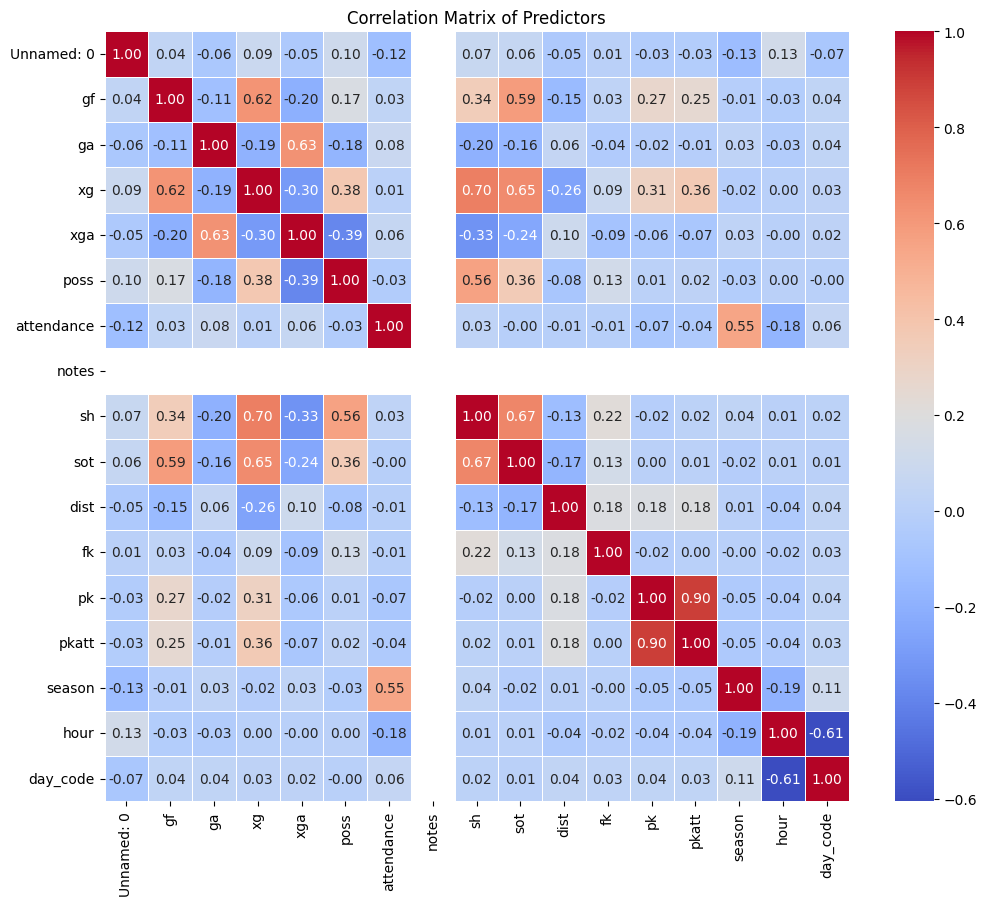

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix_predictors' is the name of your correlation matrix without the target variable
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_predictors, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Predictors")
plt.show()


In [44]:
selected_columns = ['team','round', 'xg','sot', 'gf']
selected_data = matches[selected_columns]
selected_data


,team,round,xg,sot,gf
0,Manchester City,Matchweek 1,1.9,4.0,0.0
1,Manchester City,Matchweek 2,2.7,4.0,5.0
2,Manchester City,Matchweek 3,3.8,10.0,5.0
3,Manchester City,Matchweek 4,2.9,8.0,1.0
4,Manchester City,Matchweek 5,1.1,1.0,0.0
...,...,...,...,...,...
1384,Sheffield United,Matchweek 34,0.5,1.0,0.0
1385,Sheffield United,Matchweek 35,0.7,0.0,0.0
1386,Sheffield United,Matchweek 36,1.6,3.0,1.0
1387,Sheffield United,Matchweek 37,0.8,1.0,0.0


In [45]:
selected_team = 'Manchester City'
selected_data_team = selected_data[selected_data['team'] == selected_team]
selected_data_team

,team,round,xg,sot,gf
0,Manchester City,Matchweek 1,1.9,4.0,0.0
1,Manchester City,Matchweek 2,2.7,4.0,5.0
2,Manchester City,Matchweek 3,3.8,10.0,5.0
3,Manchester City,Matchweek 4,2.9,8.0,1.0
4,Manchester City,Matchweek 5,1.1,1.0,0.0
...,...,...,...,...,...
662,Manchester City,Matchweek 34,2.1,3.0,2.0
663,Manchester City,Matchweek 35,2.2,3.0,1.0
664,Manchester City,Matchweek 36,1.3,6.0,4.0
665,Manchester City,Matchweek 37,1.0,4.0,2.0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


# Let's use 'xg' and 'sot' as features to predict 'gf'
X = selected_data[['xg', 'sot']]
y = selected_data['gf']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Now you can use the trained model for predictions on new data
# For example, if you have new data 'new_data' with columns 'xg' and 'sot'
# new_predictions = model.predict(new_data[['xg', 'sot']])


Mean Squared Error: 0.8772437752984347


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=30)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared: {r_squared:.4f}')

Mean Absolute Error (MAE): 0.7772
R-squared: 0.2459


In [48]:
selected_columns1 = ['team','sh','round','pk','pkatt', 'xg','sot', 'gf']
selected_data1 = matches[selected_columns1]
selected_data1


,team,sh,round,pk,pkatt,xg,sot,gf
0,Manchester City,18.0,Matchweek 1,0.0,0.0,1.9,4.0,0.0
1,Manchester City,16.0,Matchweek 2,0.0,0.0,2.7,4.0,5.0
2,Manchester City,25.0,Matchweek 3,0.0,0.0,3.8,10.0,5.0
3,Manchester City,25.0,Matchweek 4,0.0,0.0,2.9,8.0,1.0
4,Manchester City,16.0,Matchweek 5,0.0,0.0,1.1,1.0,0.0
...,...,...,...,...,...,...,...,...
1384,Sheffield United,8.0,Matchweek 34,0.0,0.0,0.5,1.0,0.0
1385,Sheffield United,7.0,Matchweek 35,0.0,0.0,0.7,0.0,0.0
1386,Sheffield United,10.0,Matchweek 36,0.0,0.0,1.6,3.0,1.0
1387,Sheffield United,11.0,Matchweek 37,0.0,0.0,0.8,1.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


# Let's use 'xg' and 'sot' as features to predict 'gf'
X1 = selected_data1[['sh','pk','pkatt','xg', 'sot']]
y1 = selected_data1['gf']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Now you can use the trained model for predictions on new data
# For example, if you have new data 'new_data' with columns 'xg' and 'sot'
# new_predictions = model.predict(new_data[['xg', 'sot']])


Mean Squared Error: 0.7709575169741386


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=51)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared: {r_squared:.4f}')

Mean Absolute Error (MAE): 0.7560
R-squared: 0.3319
